<a href="https://colab.research.google.com/github/ShraddhaSharma24/Deep-Learning/blob/main/Customer_churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
radheshyamkollipara_bank_customer_churn_path = kagglehub.dataset_download('radheshyamkollipara/bank-customer-churn')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.shape

(10000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname','Complain','Satisfaction Score','Card Type','Point Earned'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [ ]:
history= model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.3202 - val_accuracy: 0.8562 - val_loss: 0.3453
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3205 - val_accuracy: 0.8562 - val_loss: 0.3463
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3176 - val_accuracy: 0.8575 - val_loss: 0.3452
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3165 - val_accuracy: 0.8550 - val_loss: 0.3447
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3191 - val_accuracy: 0.8575 - val_loss: 0.3449
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3153 - val_accuracy: 0.8581 - val_loss: 0.3453
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3253 - val_accuracy: 0.8581 - val_loss: 0.3447
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3183 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[-9.98924226e-02, -2.52486110e-01, -2.57145031e-03,
         -3.78380686e-01,  3.76273811e-01,  1.98618814e-01,
          2.22793907e-01,  3.15636069e-01, -1.14684761e-01,
         -5.19712381e-02,  2.85230786e-01],
        [-1.98181733e-01, -4.70884033e-02, -5.65575838e-01,
         -1.09222218e-01, -9.42048013e-01,  9.92801599e-03,
          3.29879224e-01, -3.08232784e-01, -9.88830566e-01,
         -2.65528202e-01, -2.28220493e-01],
        [ 2.19570130e-01, -1.59744918e-01,  1.64296590e-02,
          1.35905161e-01, -2.14047208e-01, -1.01310134e-01,
         -5.71736693e-02, -5.82174174e-02, -2.19421670e-01,
         -1.14588648e-01, -9.38272253e-02],
        [-6.12784445e-01, -1.81333378e-01,  2.60086320e-02,
          1.50349811e-01,  6.63729072e-01,  2.72775233e-01,
         -2.81271674e-02, -2.83773154e-01, -2.10074186e-01,
          2.26931259e-01, -4.84054714e-01],
        [-5.08386731e-01, -9.87992525e-01, -2.19600983e-02,
          6.90261066e-01, -3.98844242e-01,  

In [ ]:
model.layers[1].get_weights()

[array([[ 0.3217867 ,  0.39382035, -1.1053145 ,  0.2840343 ,  0.46853372,
         -0.30030328,  0.55160296, -0.37835303,  0.73304814, -0.1355154 ,
         -0.10729212],
        [ 0.37369904, -0.3880233 ,  0.08104277,  0.5816466 , -0.4498348 ,
          0.1309748 , -0.44361785,  0.6248165 ,  0.22401308,  0.4228292 ,
          0.5027091 ],
        [-0.7006923 ,  0.5636491 ,  0.2074287 , -0.5783409 ,  0.29171166,
         -0.4765285 ,  0.1211466 , -0.43096253, -0.10318775, -0.50657624,
          0.6088472 ],
        [-0.60347605, -0.7562783 ,  0.01639178,  0.34617856,  0.4838921 ,
          0.46916574,  0.06885992,  0.31367165,  0.29057038,  0.15088055,
          0.16802087],
        [-0.48156512,  0.47540203,  0.78279924,  0.27401197,  0.22924393,
         -0.15428858,  0.47554904, -0.7196821 , -0.32656708, -0.50565654,
         -0.3874185 ],
        [-1.974654  ,  0.15035768, -0.47207436, -0.6660507 , -0.31269842,
          0.58471024, -0.55873275,  0.560399  ,  0.2690932 ,  0.7799529

In [ ]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.86

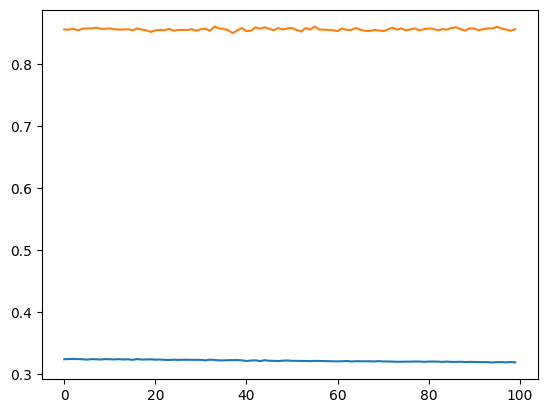

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])